In [157]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# 1. Data Understanding

In [158]:
dataset = pd.read_csv("data.csv")
print(df)

           col_0  col_1     col_2  col_3     col_4     col_5     col_6  \
0       0.860224    1.0  0.905699    0.0  0.000000  0.897801  0.416134   
1       0.899660    0.0  0.950384    0.0  0.000000  0.899660  0.814271   
2       0.604478    0.0  0.901425    0.0  0.544263  0.816494  0.542276   
3       0.786914    0.0  0.874471    0.0  0.000000  0.767869  0.792423   
4       0.485634    1.0  0.909619    0.5  0.000000  0.499489  1.000000   
...          ...    ...       ...    ...       ...       ...       ...   
280999  1.032293    0.0  0.627504    0.0 -0.934179  1.193713 -0.194791   
281000  0.555958    0.0  0.686127    0.0  1.102023  0.346999 -0.271032   
281001  0.515235    0.0  0.672777    0.0  1.257941  1.193937  1.551960   
281002  0.497795    0.0  1.147425    0.0 -0.724074  0.334741  1.795984   
281003  1.071413    0.0  0.629556    0.0  1.317902  0.409869 -0.201267   

           col_7     col_8     col_9      col_10    col_11    col_12  \
0       0.936249  0.954516  0.655994   

## 1.1 Perform exploratory data analysis and gain insights into the dataset

      col_0  col_1     col_2  col_3     col_4     col_5     col_6     col_7  \
0  0.860224    1.0  0.905699    0.0  0.000000  0.897801  0.416134  0.936249   
1  0.899660    0.0  0.950384    0.0  0.000000  0.899660  0.814271  0.965632   
2  0.604478    0.0  0.901425    0.0  0.544263  0.816494  0.542276  0.929602   
3  0.786914    0.0  0.874471    0.0  0.000000  0.767869  0.792423  0.901341   
4  0.485634    1.0  0.909619    0.5  0.000000  0.499489  1.000000  0.644051   

      col_8     col_9  col_10    col_11    col_12    col_13  label  
0  0.954516  0.655994    70.0  0.904535  0.477965  1.000000      1  
1  0.895718  0.866131    36.0  0.726427  0.770299  1.000000      1  
2  0.982845  0.943498   106.0  0.855471  0.602923  0.670886      1  
3  0.815631  0.793568   135.0  0.843382  1.000000  1.000000      1  
4  0.890473  0.998848     0.0  0.825947  1.000000  0.000000      1  
Dataset Shape: (281004, 15)
Column Names: ['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_

f:\C\Users\EliteGuru\PY37\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


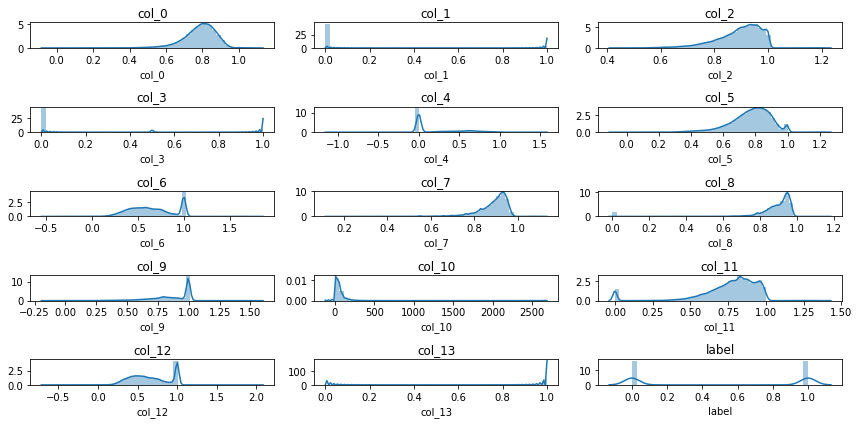

<Figure size 864x432 with 0 Axes>

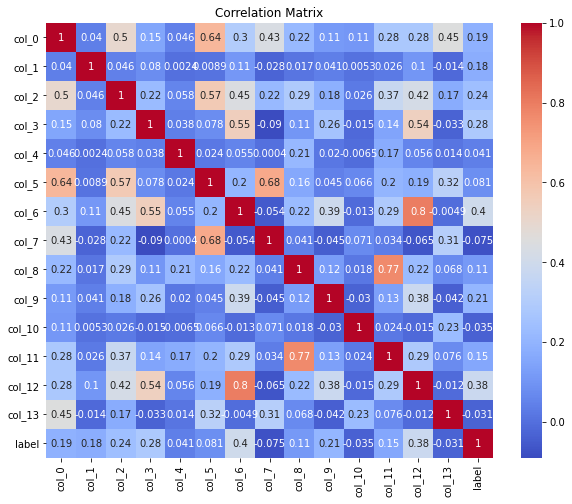

In [159]:
# Display the first few rows of the dataset
print(dataset.head())

# Check the shape of the dataset
print("Dataset Shape:", dataset.shape)

# Get the column names of the dataset
column_names = dataset.columns.tolist()
print("Column Names:", column_names)

# Check the data types of each feature
print("Data Types:")
print(dataset.dtypes)

# Check for missing values in each column
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)

# Calculate basic statistics for numeric features
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_stats = numeric_features.describe()
print("Numeric Feature Statistics:")
print(numeric_stats)

# Calculate the unique values for categorical features
categorical_features = dataset.select_dtypes(include=[np.object])
categorical_counts = {}
for column in categorical_features:
    categorical_counts[column] = dataset[column].nunique()
print("Categorical Feature Unique Value Counts:")
print(categorical_counts)

# Visualize the distributions of numeric features
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_features.columns):
    plt.subplot(5, 3, i + 1)
    sns.distplot(dataset[column].dropna(), kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Visualize the value counts of categorical features
plt.figure(figsize=(12, 6))
for i, column in enumerate(categorical_features.columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=dataset, x=column)
    plt.title(column)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the correlations between numeric features
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 1.2 Interpret the significance of each feature.

In [160]:
# Interpret the significance of each feature
# Analyze the meaning and context of each feature
# Determine the relationship between features and the target variable
# Identify potential outliers or anomalies in the data
# Consider domain knowledge or consult with subject matter experts, if available

# Example: Interpret significance of a specific feature
for i, column in enumerate(numeric_features.columns):
    feature = column
    print("Significance of feature '{}'".format(feature))
    print("Mean: {:.2f}".format(dataset[feature].mean()))
    print("Standard Deviation: {:.2f}".format(dataset[feature].std()))
    print("Minimum: {:.2f}".format(dataset[feature].min()))
    print("Maximum: {:.2f}".format(dataset[feature].max()))

Significance of feature 'col_0'
Mean: 0.79
Standard Deviation: 0.09
Minimum: -0.06
Maximum: 1.11
Significance of feature 'col_1'
Mean: 0.09
Standard Deviation: 0.28
Minimum: 0.00
Maximum: 1.00
Significance of feature 'col_2'
Mean: 0.89
Standard Deviation: 0.08
Minimum: 0.43
Maximum: 1.21
Significance of feature 'col_3'
Mean: 0.13
Standard Deviation: 0.32
Minimum: 0.00
Maximum: 1.00
Significance of feature 'col_4'
Mean: 0.20
Standard Deviation: 0.30
Minimum: -1.08
Maximum: 1.51
Significance of feature 'col_5'
Mean: 0.77
Standard Deviation: 0.13
Minimum: -0.08
Maximum: 1.24
Significance of feature 'col_6'
Mean: 0.65
Standard Deviation: 0.25
Minimum: -0.49
Maximum: 1.80
Significance of feature 'col_7'
Mean: 0.88
Standard Deviation: 0.07
Minimum: 0.13
Maximum: 1.12
Significance of feature 'col_8'
Mean: 0.86
Standard Deviation: 0.19
Minimum: 0.00
Maximum: 1.17
Significance of feature 'col_9'
Mean: 0.86
Standard Deviation: 0.17
Minimum: -0.15
Maximum: 1.56
Significance of feature 'col_10'
Me

# 2. Feature Importance

## 2.1 Identify the essential features and their significance using feature selection techniques like correlation, feature importance from models.

In [161]:
X = dataset.iloc[:, 0 : 13]
y = dataset.iloc[:, 14]

### 2.1.1: Correlation-based Feature Selection

In [162]:
threshold = 0.9  # Set the threshold for correlation
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("Correlated features with correlation > 0.9:")
print(correlated_features)

Correlated features with correlation > 0.9:
set()


### 2.1.2 Feature Importance using Random Forest Classifier

In [163]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance using Random Forest Classifier:")
print(feature_importance_df)

Feature Importance using Random Forest Classifier:
   Feature  Importance
6    col_6    0.160193
12  col_12    0.106297
0    col_0    0.094930
5    col_5    0.091634
2    col_2    0.087749
7    col_7    0.082360
9    col_9    0.081923
8    col_8    0.075090
11  col_11    0.074669
10  col_10    0.070193
4    col_4    0.034742
3    col_3    0.020633
1    col_1    0.019587


### 2.1.3 Univariate Feature Selection using SelectKBest and f_classif

In [164]:
selector = SelectKBest(f_classif, k=7)  # Select top 7 features
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]
print("Top 9 features selected using SelectKBest and f_classif:")
print(selected_features)

Top 9 features selected using SelectKBest and f_classif:
Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_6', 'col_9', 'col_12'], dtype='object')


## From the analysis of above results, we can choose columns of 6, 12, 0, 2, 9 as main features

# 3. Outlier Detection

# 3.1 Identify outliers using statistical methods like Z-score, IQR, or visualization techniques like box plots, scatter plots.

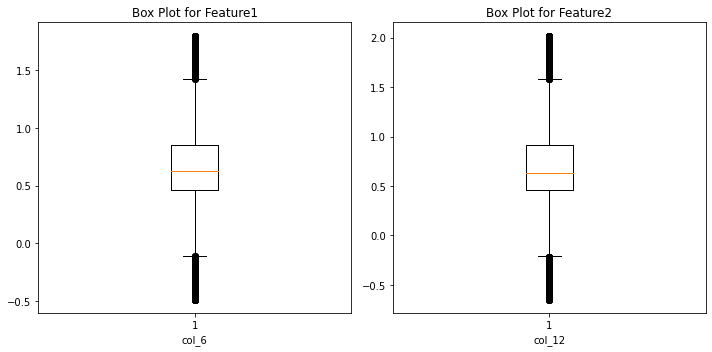

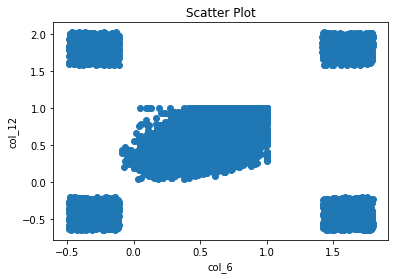

Outliers detected using Z-score:
           col_0  col_1     col_2  col_3     col_4     col_5     col_6  \
0       0.860224    1.0  0.905699    0.0  0.000000  0.897801  0.416134   
4       0.485634    1.0  0.909619    0.5  0.000000  0.499489  1.000000   
7       0.737101    1.0  0.991354    1.0  0.000000  0.773017  1.000000   
13      0.876125    1.0  0.864779    1.0  0.000000  0.625166  1.000000   
14      0.791416    1.0  0.965031    0.0  0.000000  0.896269  0.675879   
...          ...    ...       ...    ...       ...       ...       ...   
280999  1.032293    0.0  0.627504    0.0 -0.934179  1.193713 -0.194791   
281000  0.555958    0.0  0.686127    0.0  1.102023  0.346999 -0.271032   
281001  0.515235    0.0  0.672777    0.0  1.257941  1.193937  1.551960   
281002  0.497795    0.0  1.147425    0.0 -0.724074  0.334741  1.795984   
281003  1.071413    0.0  0.629556    0.0  1.317902  0.409869 -0.201267   

           col_7     col_8     col_9      col_10    col_11    col_12  
0      

In [165]:
# Calculate Z-score
z_scores = np.abs((X - X.mean()) / X.std())

# Set a threshold for Z-score (e.g., 3)
z_score_threshold = 3

# Identify outliers using Z-score
outliers_zscore = X[(z_scores > z_score_threshold).any(axis=1)]

# Calculate IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for IQR (e.g., 1.5)
iqr_threshold = 1.5

# Identify outliers using IQR
outliers_iqr = X[((X < (Q1 - iqr_threshold * IQR)) | (X > (Q3 + iqr_threshold * IQR))).any(axis=1)]

# Plot box plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(X.iloc[:, 6])
plt.xlabel('col_6')
plt.title('Box Plot for Feature1')

plt.subplot(1, 2, 2)
plt.boxplot(X.iloc[:, 12])
plt.xlabel('col_12')
plt.title('Box Plot for Feature2')

plt.tight_layout()
plt.show()

# Plot scatter plot
plt.scatter(X.iloc[:, 6], X.iloc[:, 12])
plt.xlabel('col_6')
plt.ylabel('col_12')
plt.title('Scatter Plot')
plt.show()

# Print the identified outliers
print("Outliers detected using Z-score:")
print(outliers_zscore)

print("\nOutliers detected using IQR:")
print(outliers_iqr)

# 3.2 Decide how to handle outliers based on the specific context and goals of the analysis

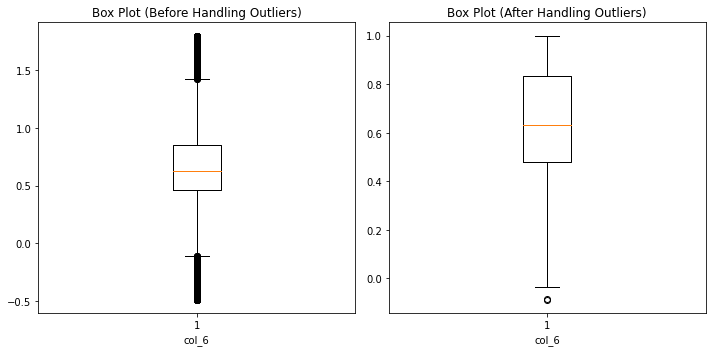

Original Data:
           col_0  col_1     col_2  col_3     col_4     col_5     col_6  \
0       0.860224    1.0  0.905699    0.0  0.000000  0.897801  0.416134   
1       0.899660    0.0  0.950384    0.0  0.000000  0.899660  0.814271   
2       0.604478    0.0  0.901425    0.0  0.544263  0.816494  0.542276   
3       0.786914    0.0  0.874471    0.0  0.000000  0.767869  0.792423   
4       0.485634    1.0  0.909619    0.5  0.000000  0.499489  1.000000   
...          ...    ...       ...    ...       ...       ...       ...   
280999  1.032293    0.0  0.627504    0.0 -0.934179  1.193713 -0.194791   
281000  0.555958    0.0  0.686127    0.0  1.102023  0.346999 -0.271032   
281001  0.515235    0.0  0.672777    0.0  1.257941  1.193937  1.551960   
281002  0.497795    0.0  1.147425    0.0 -0.724074  0.334741  1.795984   
281003  1.071413    0.0  0.629556    0.0  1.317902  0.409869 -0.201267   

           col_7     col_8     col_9      col_10    col_11    col_12  
0       0.936249  0.95451

In [166]:
# Calculate Z-score
z_scores = np.abs((X - X.mean()) / X.std())

# Set a threshold for Z-score (e.g., 3)
z_score_threshold = 3

# Identify outliers using Z-score
outliers_zscore = X[(z_scores > z_score_threshold).any(axis=1)]

# Decide how to handle outliers
# Remove outliers
data_no_outliers = X[(z_scores <= z_score_threshold).all(axis=1)]

# Replace outliers with the median value
data_median_replaced = X.copy()
for feature in X.columns:
    median = X[feature].median()
    data_median_replaced.loc[z_scores[feature] > z_score_threshold, feature] = median

# Winsorize outliers to a specified percentile
from scipy.stats.mstats import winsorize
data_winsorized = X.copy()
for feature in X.columns:
    data_winsorized[feature] = winsorize(X[feature], limits=(0.05, 0.05))

# Plot box plots before and after handling outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(X.iloc[:, 6])
plt.xlabel('col_6')
plt.title('Box Plot (Before Handling Outliers)')

plt.subplot(1, 2, 2)
plt.boxplot(data_no_outliers.iloc[:, 6])
plt.xlabel('col_6')
plt.title('Box Plot (After Handling Outliers)')

plt.tight_layout()
plt.show()

# Print the original and modified datasets
print("Original Data:")
print(X)

print("\nData (Outliers Removed):")
print(data_no_outliers)

print("\nData (Outliers Replaced with Median):")
print(data_median_replaced)

print("\nData (Outliers Winsorized):")
print(data_winsorized)

# 4. Feature Engineering

## 4.1 Create new features from existing ones to capture underlying patterns in the data by applying techniques like polynomial features, interactions, binning

In [167]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X[['col_6', 'col_12']])
poly_columns = poly.get_feature_names(['col_6', 'col_12'])
data_poly = pd.DataFrame(poly_features, columns=poly_columns)

# Interactions
# X['Interaction'] = X['Feature1'] * X['Feature2']
interaction = X['col_6'] * X['col_12']

# Binning
# X['BinnedFeature1'] = pd.cut(X['Feature1'], bins=[0, 20, 30, 100], labels=['Low', 'Medium', 'High'])
# X['BinnedFeature2'] = pd.qcut(X['Feature2'], q=3, labels=['Low', 'Medium', 'High'])

BinnedFeature1 = pd.cut(X['col_6'], bins=[0, 20, 30, 100], labels=['Low', 'Medium', 'High'])
BinnedFeature2 = pd.qcut(X['col_12'], q=3, labels=['Low', 'Medium', 'High'])

# Print the original and modified datasets
print("Original Data:")
print(X)

print("\nData (Polynomial Features):")
print(data_poly)

print("\nData (Interactions):")
print(X[['col_6', 'col_12']])
print(interaction)

print("\nData (Binning):")
print(X[['col_6', 'col_12']])
print(BinnedFeature1)
print(BinnedFeature2)

Original Data:
           col_0  col_1     col_2  col_3     col_4     col_5     col_6  \
0       0.860224    1.0  0.905699    0.0  0.000000  0.897801  0.416134   
1       0.899660    0.0  0.950384    0.0  0.000000  0.899660  0.814271   
2       0.604478    0.0  0.901425    0.0  0.544263  0.816494  0.542276   
3       0.786914    0.0  0.874471    0.0  0.000000  0.767869  0.792423   
4       0.485634    1.0  0.909619    0.5  0.000000  0.499489  1.000000   
...          ...    ...       ...    ...       ...       ...       ...   
280999  1.032293    0.0  0.627504    0.0 -0.934179  1.193713 -0.194791   
281000  0.555958    0.0  0.686127    0.0  1.102023  0.346999 -0.271032   
281001  0.515235    0.0  0.672777    0.0  1.257941  1.193937  1.551960   
281002  0.497795    0.0  1.147425    0.0 -0.724074  0.334741  1.795984   
281003  1.071413    0.0  0.629556    0.0  1.317902  0.409869 -0.201267   

           col_7     col_8     col_9      col_10    col_11    col_12  
0       0.936249  0.95451

f:\C\Users\EliteGuru\PY37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [168]:
print("\nData (Polynomial Features):")
print(data_poly)

print("\nData (Interactions):")
print(X[['col_6', 'col_12']])
print(interaction)

print("\nData (Binning):")
print(X[['col_6', 'col_12']])
print(BinnedFeature1)
print(BinnedFeature2)


Data (Polynomial Features):
           col_6    col_12   col_6^2  col_6 col_12  col_12^2
0       0.416134  0.477965  0.173167      0.198897  0.228450
1       0.814271  0.770299  0.663038      0.627232  0.593360
2       0.542276  0.602923  0.294063      0.326950  0.363516
3       0.792423  1.000000  0.627935      0.792423  1.000000
4       1.000000  1.000000  1.000000      1.000000  1.000000
...          ...       ...       ...           ...       ...
280999 -0.194791  1.932234  0.037944     -0.376382  3.733530
281000 -0.271032  1.784317  0.073459     -0.483608  3.183788
281001  1.551960  1.916109  2.408581      2.973725  3.671473
281002  1.795984 -0.290214  3.225560     -0.521220  0.084224
281003 -0.201267  1.910517  0.040508     -0.384524  3.650075

[281004 rows x 5 columns]

Data (Interactions):
           col_6    col_12
0       0.416134  0.477965
1       0.814271  0.770299
2       0.542276  0.602923
3       0.792423  1.000000
4       1.000000  1.000000
...          ...       ...
2

In [169]:
# X = X.iloc[:, [6, 12, 0, 2, 9]]

# 5. Model Building and Evaluation

## 5.1 Split the dataset into training and test sets

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Perform feature engineering, selection and scaling

In [201]:
# Perform feature engineering
poly = PolynomialFeatures(degree = 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Perform feature selection
selector = SelectKBest(f_classif, k = 9)
X_train_selected = selector.fit_transform(X_train_poly, y_train)
X_test_selected = selector.transform(X_test_poly)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

f:\C\Users\EliteGuru\PY37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
f:\C\Users\EliteGuru\PY37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## 5.3 Choose a model (RandomForest classifier) and fit it on the training data

In [202]:
# Train the model
model = rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## 5.4 Make predictions on the test data

In [203]:
y_pred = model.predict(X_test_scaled)

## 5.5 Evaluate the model using appropriate metrics

In [204]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report)

TypeError: 'str' object is not callable

In [205]:
accuracy

0.673048522268287